In [143]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler
from data import classTDataSet
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import models
from pathlib import Path
from sklearn.metrics import confusion_matrix

In [126]:
dataRange = range(35, 36)
d = classTDataSet(dataRange, h=512, w=512)

prate = d.prate
weights = []
for _, l in d:
    weights.append(1-prate if l==1 else prate)
trainSampler = WeightedRandomSampler(weights, len(d), replacement=True)
dl = DataLoader(d,batch_size=16,num_workers=4,sampler=trainSampler)

device = torch.device('cuda:0')

pLabel:49 nLabel:237


In [163]:
dataRange = range(37, 38)
d = classTDataSet(dataRange, h=512, w=512)

dl = DataLoader(d,batch_size=16,num_workers=4,shuffle=False)

device = torch.device('cuda:0')

pLabel:68 nLabel:176


In [ ]:
outputDir = Path('modelResNet2Class')
thisRunName = Path('baseLineExp1')
modelWeightSave = Path('weight.pth')
resnet_model = models.resnet50(pretrained=False)
fc_features = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(fc_features, 2)
resnet_model.load_state_dict(torch.load(str(outputDir/modelWeightSave)))
resnet_model.to(device)

In [164]:
outputDir = Path('modelResNet2Class')
thisRunName = Path('baseLineExp2ClsBal')
modelWeightSave = Path('weightClsBal.pth')
resnet_model = models.resnet50(pretrained=False)
fc_features = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(fc_features, 2)
resnet_model.load_state_dict(torch.load(str(outputDir/modelWeightSave)))
resnet_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [165]:
class_probs = []
class_preds = []
true_label = []
net = resnet_model
with torch.no_grad():
    for data in dl:
        inputs, labels = data[0].to(device), data[1].to(device)
        output = resnet_model(inputs)
        class_probs_batch = [F.softmax(el, dim=0) for el in output]
        _, class_preds_batch = torch.max(output, 1)

        class_probs.append(class_probs_batch)
        class_preds.append(class_preds_batch)
        true_label.append(labels)

test_probs = torch.cat([torch.stack(batch) for batch in class_probs])
test_preds = torch.cat(class_preds)
gt = torch.cat(true_label)

In [166]:
pro = test_probs

In [167]:
confusion_matrix(gt.cpu().numpy(), test_preds.cpu().numpy())

array([[96, 80],
       [59,  9]])

In [168]:
test_preds

tensor([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1], device='cuda:0')

In [169]:
gt

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')

In [46]:
test_preds = test_preds.cpu().numpy()

In [121]:
image, label = d[150]

In [122]:
image.shape

(3, 512, 512)

In [123]:
label

1

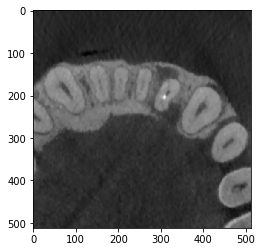

In [162]:
plt.imshow(image[2], cmap='gray')

In [103]:
diter = iter(dl)

In [104]:
_, l = diter.next()

In [105]:
l

tensor([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [69]:
d.prate

0.16748768472906403